In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score
from sklearn.feature_extraction.text import CountVectorizer
import joblib
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Load the dataset
df = pd.read_csv('spam.csv')

In [ ]:
df.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
df.sample(5)

,Category,Message
3222,spam,"Thanks for your ringtone order, reference numb..."
2057,ham,.Please charge my mobile when you get up in mo...
269,ham,The evo. I just had to download flash. Jealous?
3913,spam,You have an important customer service announc...
3687,ham,I get out of class in bsn in like &lt;#&gt; ...


In [ ]:
df.shape

(5572, 2)

In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
df.shape

(5157, 2)

In [ ]:
df.isnull().sum()

,0
Category,0
Message,0


In [ ]:
df['Category'] = df['Category'].replace(['ham','spam'],['Not Spam','Spam'])
df.head()

,Category,Message
0,Not Spam,"Go until jurong point, crazy.. Available only ..."
1,Not Spam,Ok lar... Joking wif u oni...
2,Spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,Not Spam,U dun say so early hor... U c already then say...
4,Not Spam,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5157 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5157 non-null   object
 1   Message   5157 non-null   object
dtypes: object(2)
memory usage: 120.9+ KB


Data Preprocessing

In [ ]:
from sklearn.preprocessing import LabelEncoder
encoder =LabelEncoder()

df['Category']= encoder.fit_transform(df['Category'])

In [ ]:
df.head()

,Category,Message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
df['Category'].value_counts()

,count
Category,
0,4516
1,641


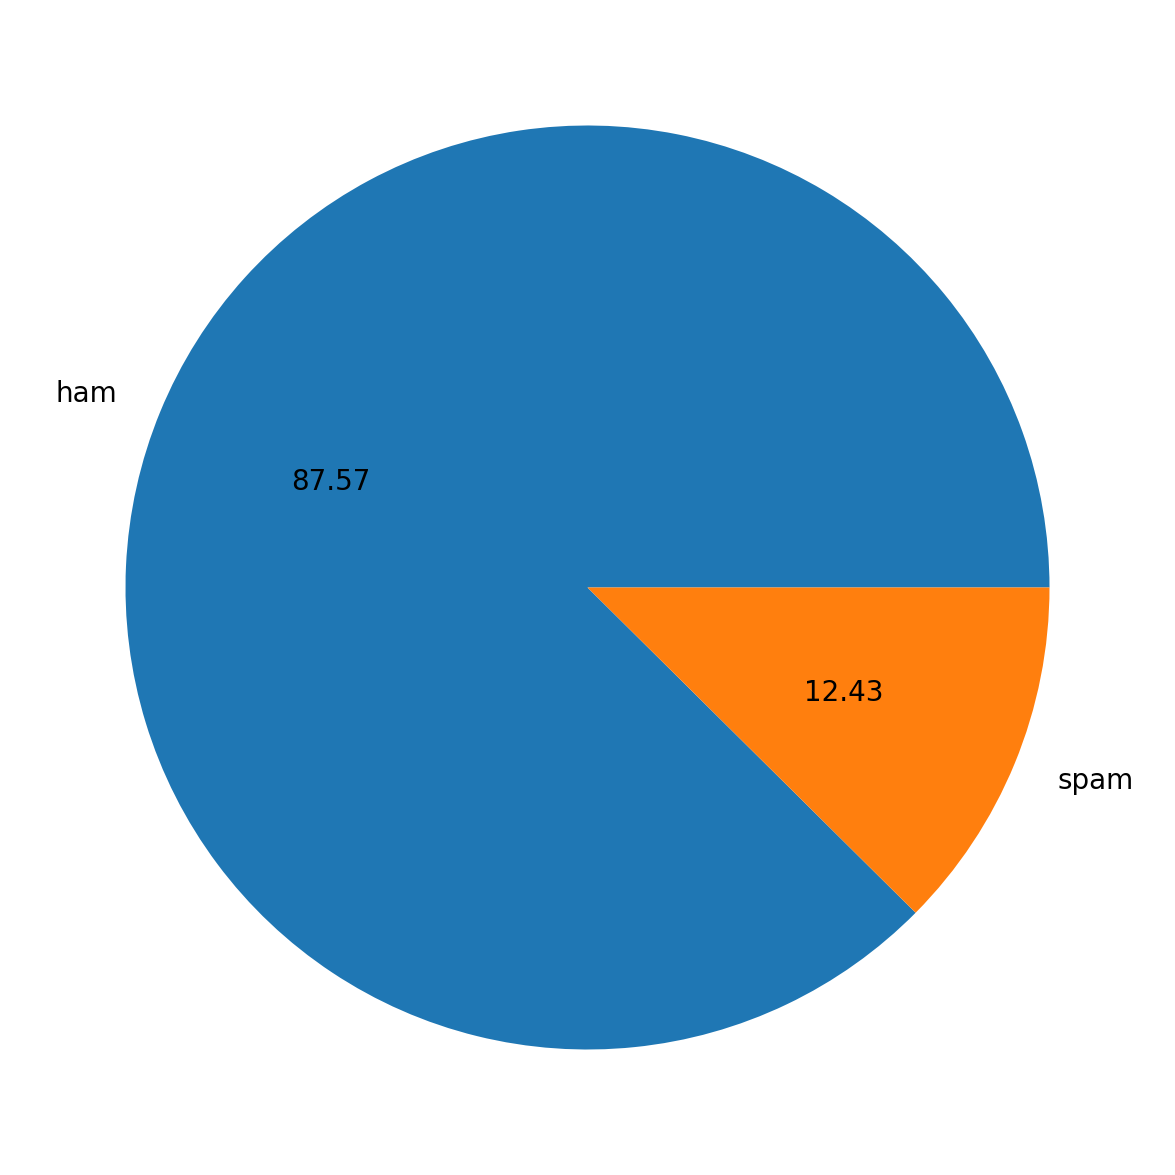

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,15))
plt.rcParams.update({'font.size':20})
plt.pie(df['Category'].value_counts(), labels=['ham', 'spam'], autopct="%0.2f")
plt.show()

In [ ]:
df['num_character'] = df['Message'].apply(len)

In [ ]:
df.sample(5)

,Category,Message,num_character
1310,0,"Ok, be careful ! Don't text and drive !",39
1323,0,Oh just getting even with u.... u?,34
3066,0,"Sounds good, keep me posted",27
4974,0,Oops I was in the shower when u called. Hey a ...,142
2456,0,"Abeg, make profit. But its a start. Are you us...",88


In [ ]:
df.head()

,Category,Message,num_character
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [ ]:
df.describe()

,Category,num_character
count,5157.000000,5157.000000
mean,0.124297,79.103936
std,0.329952,58.382922
min,0.000000,2.000000
25%,0.000000,36.000000
50%,0.000000,61.000000
75%,0.000000,118.000000
max,1.000000,910.000000


In [ ]:
# for HAM messages
df[df.Category==0].describe().drop(columns='Category')

,num_character
count,4516.000000
mean,70.869353
std,56.708301
min,2.000000
25%,34.000000
50%,53.000000
75%,91.000000
max,910.000000


In [ ]:
# for SPAM messages
df[df.Category==1].describe().drop(columns='Category')

,num_character
count,641.000000
mean,137.118565
std,30.399707
min,7.000000
25%,130.000000
50%,148.000000
75%,157.000000
max,223.000000


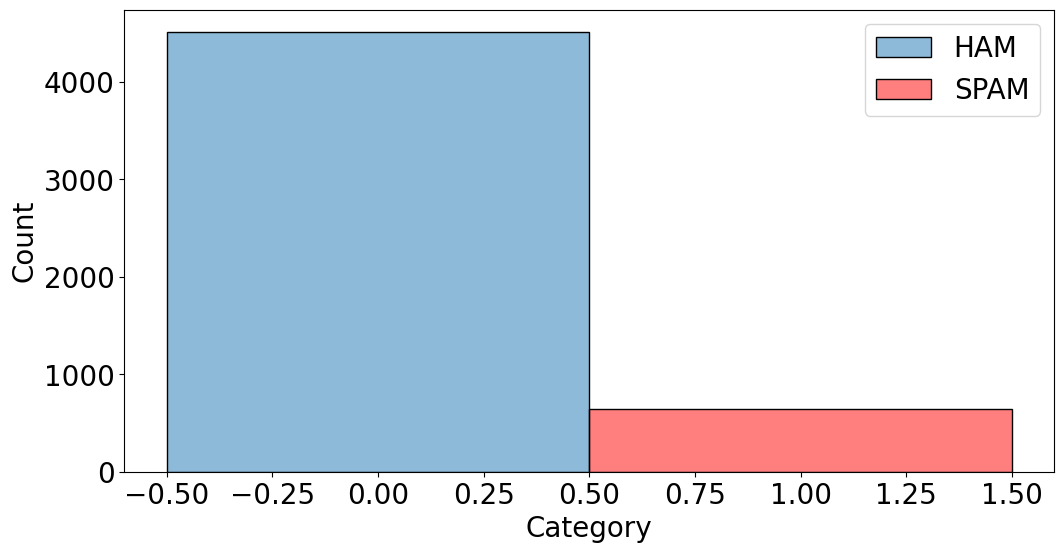

In [ ]:
import seaborn as sns
plt.figure(figsize=(12,6))
sns.histplot(df[df.Category==0]['Category'],label='HAM',kde=True)
sns.histplot(df[df.Category==1]['Category'],color='red',label='SPAM',kde=True)
plt.legend()


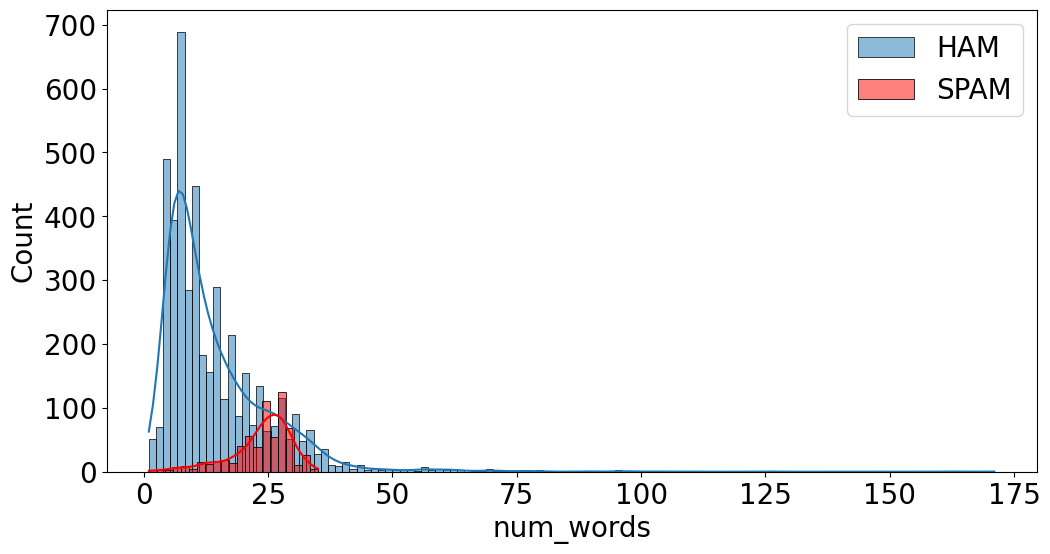

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
# Assuming df1 has a column named 'text' containing the messages
# Create 'num_words' column by counting words in 'text' column
df['num_words'] = df['Message'].apply(lambda x: len(x.split()))

plt.figure(figsize=(12,6))
sns.histplot(df[df.Category==0]['num_words'],label='HAM',kde=True)
sns.histplot(df[df.Category==1]['num_words'],color='red',label='SPAM',kde=True)
plt.legend()

In [ ]:
import pandas as pd

# Select only numeric columns for correlation calculation
numeric_df = df.select_dtypes(include=['number'])

# Calculate correlation for numeric columns
correlation_matrix = numeric_df.corr()

# Display the correlation matrix
print(correlation_matrix)

               Category  num_character  num_words
Category       1.000000       0.374409   0.279540
num_character  0.374409       1.000000   0.973985
num_words      0.279540       0.973985   1.000000


<Figure size 1500x1000 with 0 Axes>

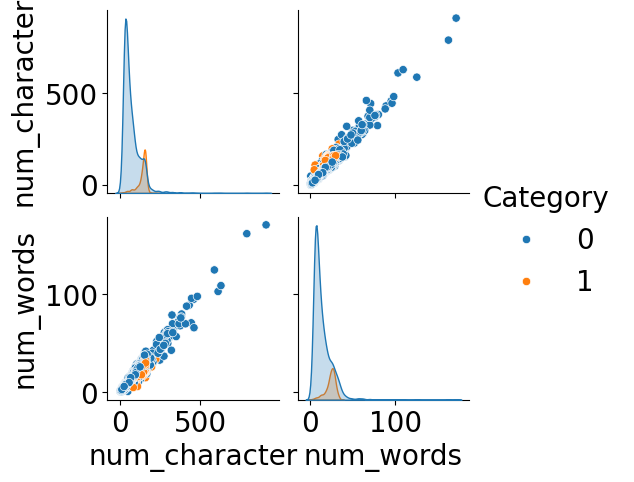

In [ ]:
plt.figure(figsize=(15,10))
sns.pairplot(df, hue='Category')

<Axes: >

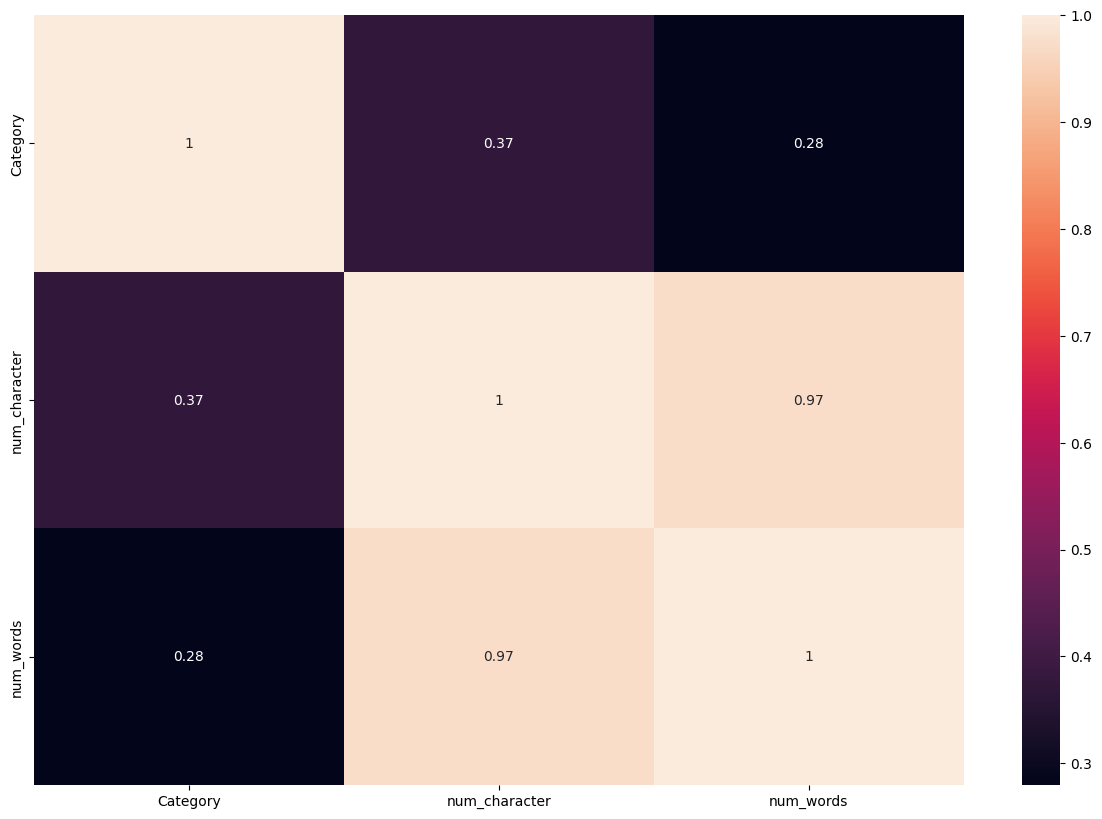

In [ ]:
## Visualize correlation using SNS heatmap
plt.figure(figsize=(15,10))
plt.rcParams.update({'font.size':10})
# Calculate correlation for only numeric columns
numeric_df = df.select_dtypes(include=['number'])
sns.heatmap(numeric_df.corr(),annot=True)

Text Split for Count Vectorizer

In [ ]:
# Split data into features and labels
X = df['Message']
y = df['Category']

In [ ]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
# Convert text data into numeric form using CountVectorizer
cv = CountVectorizer(stop_words='english')
features = cv.fit_transform(X_train)

# Initialize models
models = {
"Naive Bayes": MultinomialNB(),
"Logistic Regression": LogisticRegression(max_iter=1000), "SVM": SVC(probability=True),
"Random Forest": RandomForestClassifier(), "Gradient Boosting": GradientBoostingClassifier()
}

# Display model performance
for model_name, model in models.items():
    # Train the model
    # Fit the model using the features extracted by CountVectorizer
    model.fit(cv.transform(X_train), y_train)

    # Predict on test data
    # Transform the test data before prediction
    y_pred = model.predict(cv.transform(X_test))

    # Calculate accuracy and precision
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)

    # Display results
    print(f"Model: {model_name}")
    print(f"  Accuracy: {accuracy:.2f}")
    print(f"  Precision: {precision:.2f}")
    print("-" * 30)


Model: Naive Bayes
  Accuracy: 0.99
  Precision: 0.95
------------------------------
Model: Logistic Regression
  Accuracy: 0.98
  Precision: 0.99
------------------------------
Model: SVM
  Accuracy: 0.98
  Precision: 0.99
------------------------------
Model: Random Forest
  Accuracy: 0.97
  Precision: 0.98
------------------------------
Model: Gradient Boosting
  Accuracy: 0.95
  Precision: 0.96
------------------------------


In [ ]:
# Define the transform_text function
def transform_text(text):
    """Applies desired transformations to the input text.

    Args:
        text: The input text string.

    Returns:
        The transformed text string.
    """
    # Example transformation: Lowercasing the text
    return text.lower()
    # You can add more complex transformations here,
    # such as removing punctuation, stemming, etc.


# Assuming 'Message' is the column in df containing the original text data
df['transformed_text'] = df['Message'].apply(transform_text)

# Now you can access the 'transformed_text' column
df.transformed_text.head()

,transformed_text
0,"go until jurong point, crazy.. available only ..."
1,ok lar... joking wif u oni...
2,free entry in 2 a wkly comp to win fa cup fina...
3,u dun say so early hor... u c already then say...
4,"nah i don't think he goes to usf, he lives aro..."


Word Cloud for SPAM and NONSPAM

In [ ]:
from wordcloud import WordCloud

In [ ]:
wc = WordCloud(width=1000, height=1000, min_font_size=14, background_color='white')

In [ ]:
spam_wc= wc.generate(df[df['Category']==1]['transformed_text'].str.cat(sep=' '))

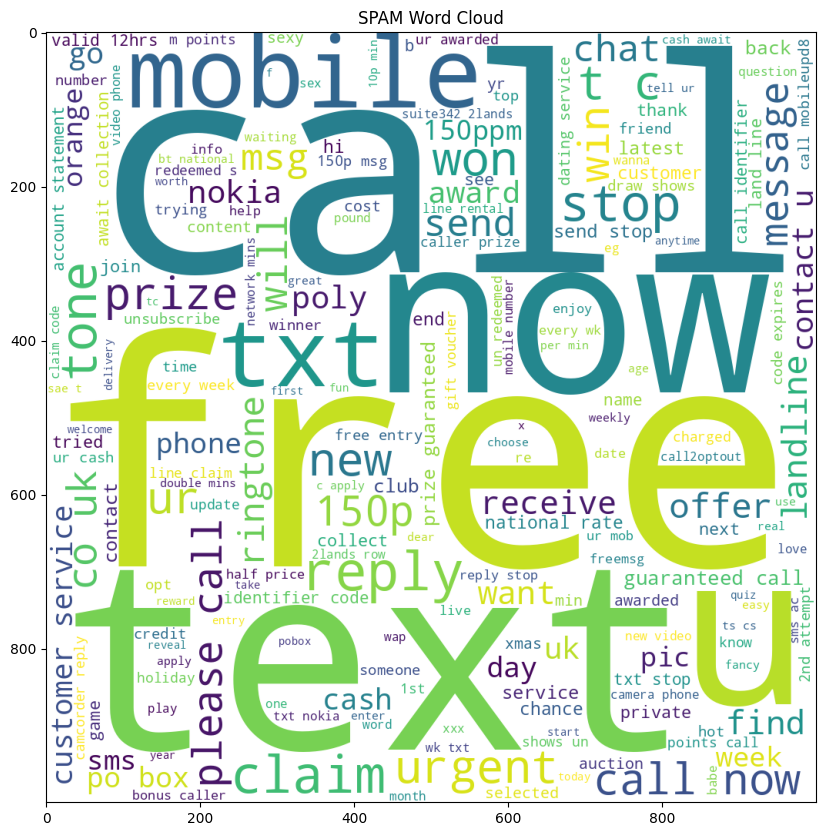

In [ ]:
# plotting word cloud for spam messages
plt.figure(figsize=(15,10))
plt.title('SPAM Word Cloud')
plt.imshow(spam_wc)

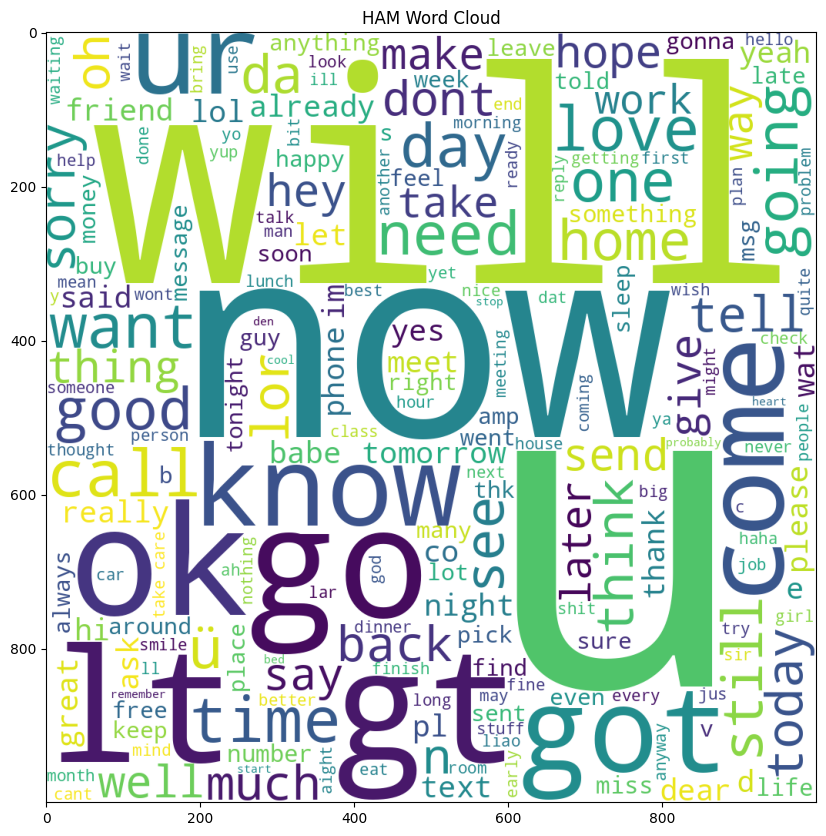

In [ ]:
ham_wc= wc.generate(df[df['Category']==0]['transformed_text'].str.cat(sep=' '))
plt.figure(figsize=(15,10))
plt.title('HAM Word Cloud')
plt.imshow(ham_wc)


In [ ]:
ham_corp = []
for msg in df[df['Category']==0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corp.append(word)

In [ ]:
spam_corp=[]
for msg in df[df['Category']==1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corp.append(word)

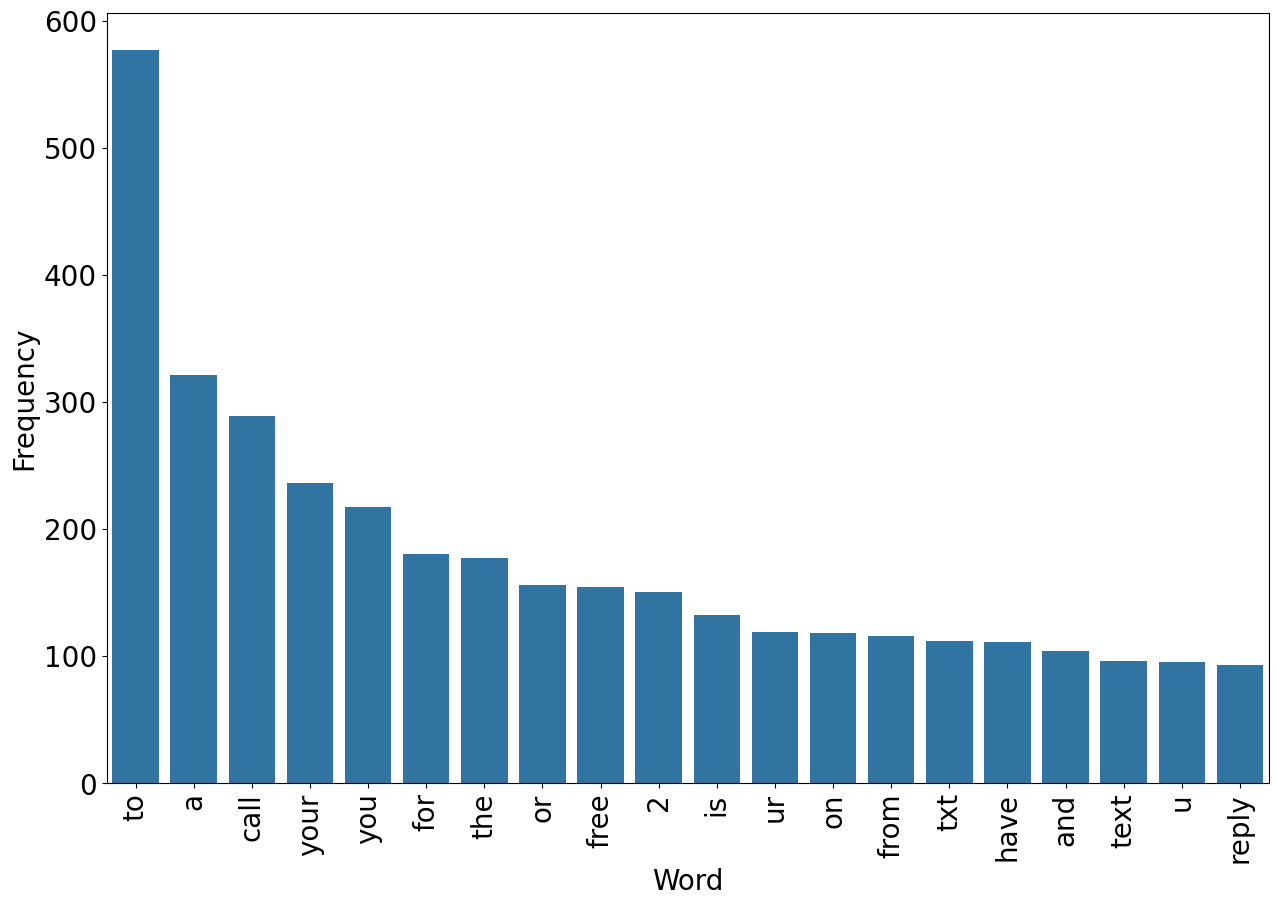

In [ ]:
from collections import Counter
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15,10))
plt.rcParams.update({'font.size':20})

# Convert the Counter object to a DataFrame
spam_corp_df = pd.DataFrame(Counter(spam_corp).most_common(20), columns=['Word', 'Frequency'])

# Use named arguments for x and y
sns.barplot(x='Word', y='Frequency', data=spam_corp_df)  # Pass x and y as keyword arguments

plt.xticks(rotation='vertical')
plt.show()

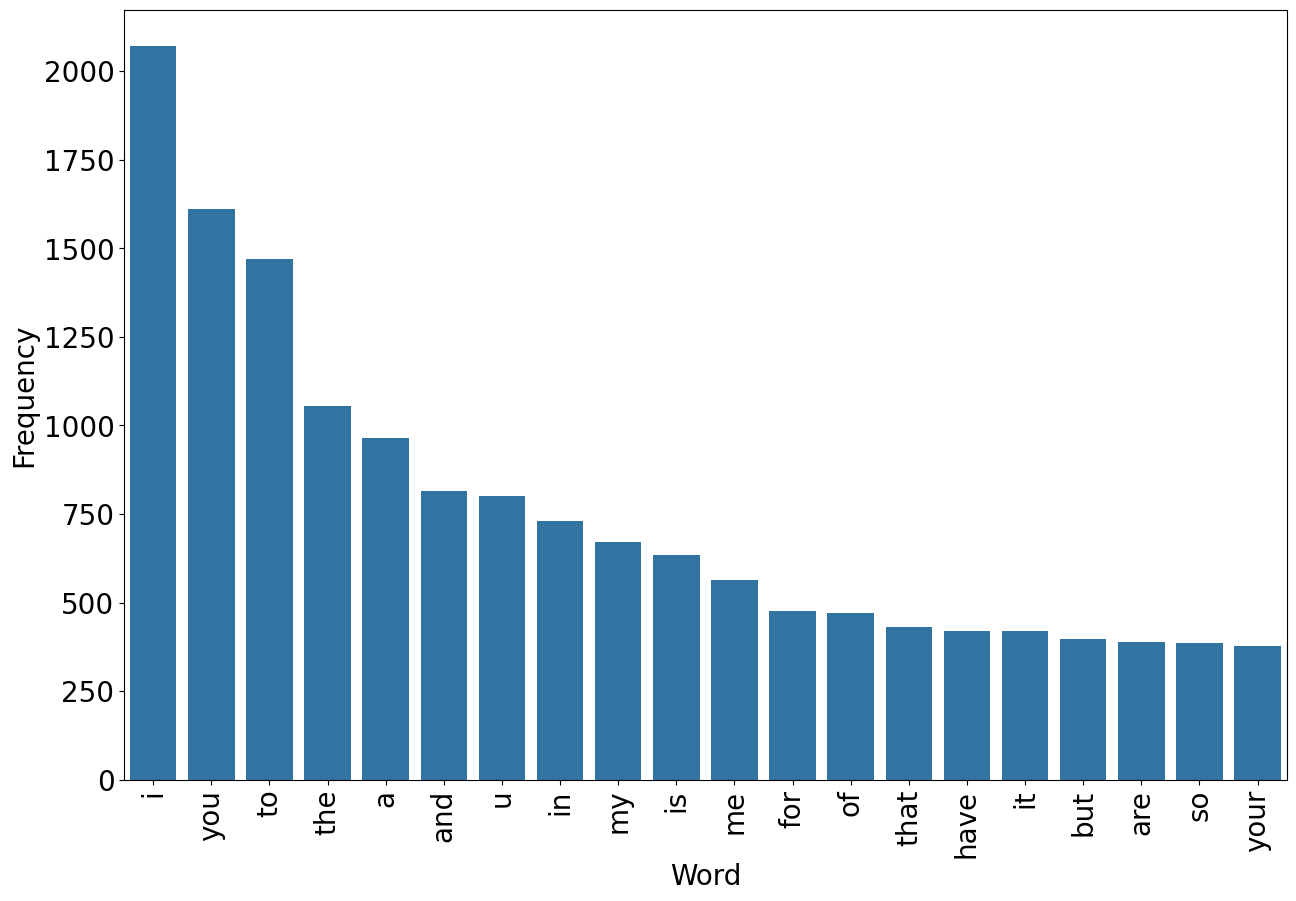

In [ ]:
plt.figure(figsize=(15,10))
plt.rcParams.update({'font.size':20})

# Convert the Counter object to a DataFrame
ham_corp_df = pd.DataFrame(Counter(ham_corp).most_common(20), columns=['Word', 'Frequency'])

# Use named arguments for x and y
sns.barplot(x='Word', y='Frequency', data=ham_corp_df)  # Pass x and y as keyword arguments

plt.xticks(rotation='vertical')
plt.show()

In [ ]:
def predict(message):
  input_message = cv.transform([message]).toarray()
  result = models.predict(input_message)
  return result
  output = predict('Congratulations, you won')
  print(output)

TFID Vectorizer

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(max_features=3000)


In [ ]:
X = tfidf.fit_transform(df['transformed_text']).toarray()
Y =df.Category.values
x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size=0.2, random_state=2)

In [ ]:
X.shape

(5157, 3000)

In [ ]:
Y =df.Category.values

In [ ]:
Y

array([0, 0, 1, ..., 0, 0, 0])

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [ ]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [ ]:
clfs = {
    'SVC' : svc,
    'KN' : knc,
    'NB': mnb,
    'DT': dtc,
    'LR': lrc,
    'RF': rfc,
    'AdaBoost': abc,
    'BgC': bc,
    'ETC': etc,
    'GBDT':gbdt,
    'xgb':xgb
}

In [ ]:
def train_classifier(clf,x_train,y_train,x_test,y_test):
  clf.fit(x_train,y_train)
  y_pred = clf.predict(x_test)
  accuracy = accuracy_score(y_test,y_pred)
  precision = precision_score(y_test,y_pred)

  return accuracy,precision
accuracy_s=[]
precision_s=[]

for name, clf in clfs.items():
    accuracy,precision = train_classifier(clf,x_train, y_train,x_test,y_test)
    print ("For {}".format(name) + ' Classifier')
    print ("Accuracy ----> {}".format(accuracy))
    print ("Precision ----> {}".format(precision))
    accuracy_s.append(accuracy)
    precision_s.append(precision)


For SVC Classifier
Accuracy ----> 0.9806201550387597
Precision ----> 0.9734513274336283
For KN Classifier
Accuracy ----> 0.9108527131782945
Precision ----> 1.0
For NB Classifier
Accuracy ----> 0.9757751937984496
Precision ----> 1.0
For DT Classifier
Accuracy ----> 0.9515503875968992
Precision ----> 0.8969072164948454
For LR Classifier
Accuracy ----> 0.9554263565891473
Precision ----> 0.9090909090909091
For RF Classifier
Accuracy ----> 0.9777131782945736
Precision ----> 1.0


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


For AdaBoost Classifier
Accuracy ----> 0.9670542635658915
Precision ----> 0.911504424778761
For BgC Classifier
Accuracy ----> 0.9689922480620154
Precision ----> 0.9439252336448598
For ETC Classifier
Accuracy ----> 0.9777131782945736
Precision ----> 1.0
For GBDT Classifier
Accuracy ----> 0.9573643410852714
Precision ----> 0.9662921348314607
For xgb Classifier
Accuracy ----> 0.9728682170542635
Precision ----> 0.9541284403669725


In [ ]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_s,'Precision':precision_s}).sort_values('Precision',ascending=False)

In [ ]:
performance_df

,Algorithm,Accuracy,Precision
1,KN,0.910853,1.000000
2,NB,0.975775,1.000000
5,RF,0.977713,1.000000
8,ETC,0.977713,1.000000
0,SVC,0.980620,0.973451
9,GBDT,0.957364,0.966292
10,xgb,0.972868,0.954128
7,BgC,0.968992,0.943925
6,AdaBoost,0.967054,0.911504
4,LR,0.955426,0.909091


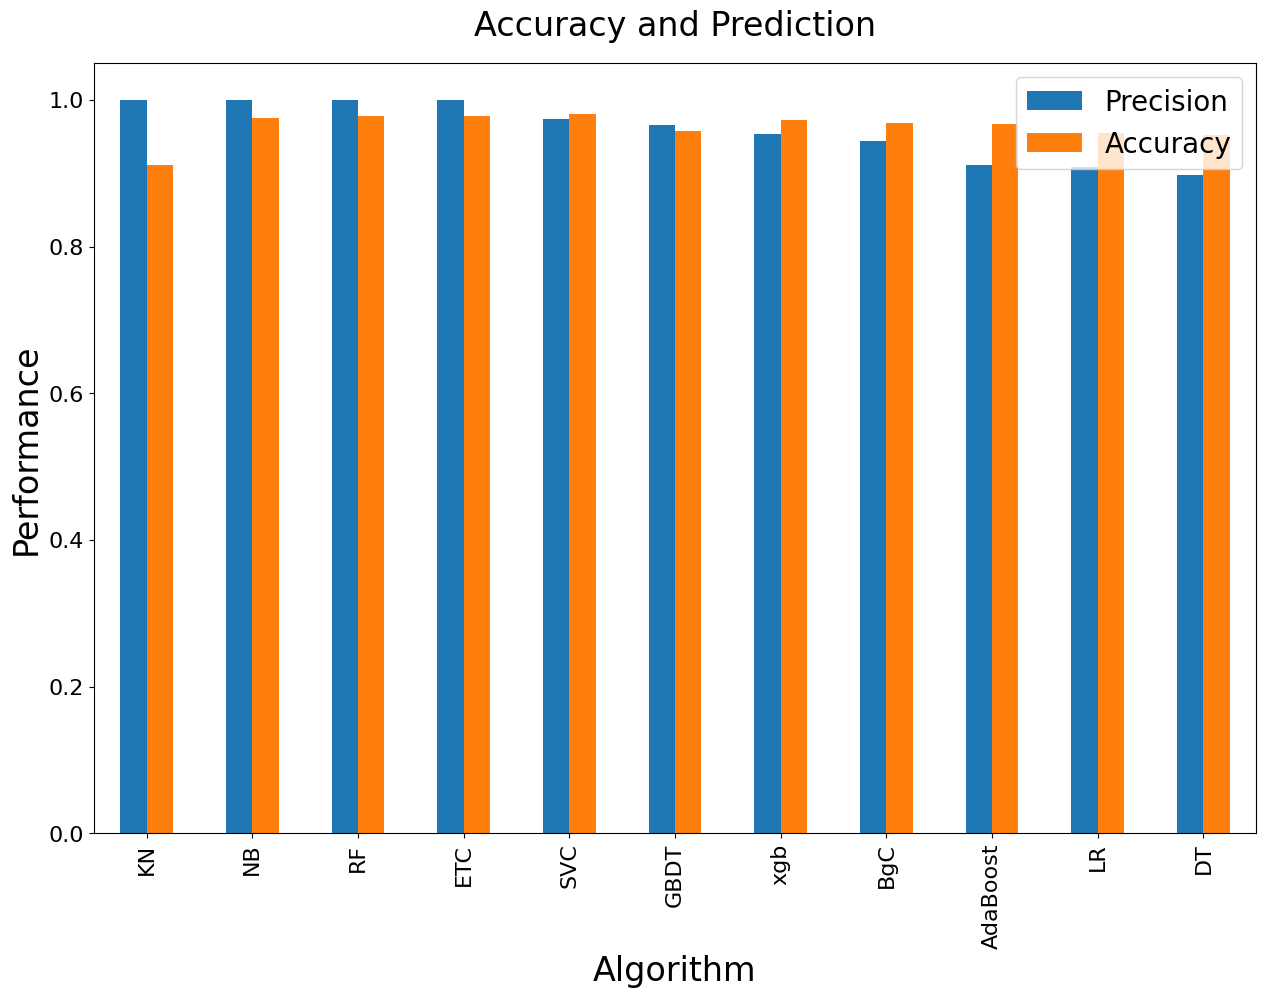

In [ ]:
## Plotting the perfomrce of classifiers
ax3 = performance_df.plot(x="Algorithm", y=["Precision", "Accuracy"],kind="bar",figsize=(15, 10), fontsize=16)
ax3.set_title('Accuracy and Prediction',pad=20, fontdict={'fontsize':24})
ax3.set_ylabel('Performance', fontdict={'fontsize':24})
ax3.set_xlabel('Algorithm', fontdict={'fontsize':24})
ax3.legend(loc='upper right',fontsize=20)
plt.xticks(rotation='vertical')
plt.show()

In [ ]:
from sklearn.ensemble import VotingClassifier
kn = KNeighborsClassifier(n_neighbors=5)
nb = MultinomialNB()
rf = RandomForestClassifier(n_estimators=50, random_state=2)

# Create a list of estimators with new models
estimators = [('KNeighbors', kn), ('NaiveBayes', nb), ('RandomForest', rf)]

# Initialize the VotingClassifier with the new estimators
voting_clf = VotingClassifier(estimators=estimators, voting='soft')

In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Convert X_train to a DataFrame if it's a Series
if isinstance(X_train, pd.Series):
    X_train = X_train.to_frame()  # Convert Series to DataFrame

# Identify columns with string (object) data type
string_columns = X_train.select_dtypes(include=['object']).columns

# Apply Label Encoding to convert string columns to numerical
for column in string_columns:
    label_encoder = LabelEncoder()
    X_train[column] = label_encoder.fit_transform(X_train[column])

# Now, you can fit your VotingClassifier
voting_clf.fit(x_train, y_train)

VotingClassifier(estimators=[('KNeighbors', KNeighborsClassifier()),
                             ('NaiveBayes', MultinomialNB()),
                             ('RandomForest',
                              RandomForestClassifier(n_estimators=50,
                                                     random_state=2))],
                 voting='soft')

In [ ]:
y_pred = voting_clf.predict(x_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.9602713178294574
Precision 1.0


In [ ]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))